In [1]:
using DataFrames
using DataStructures
using StatsPlots
using Distributions
using Interpolations
include("../../ThinkBayes.jl/src/ThinkBayes.jl")
using .ThinkBayes

In [2]:
hypos=range(0, 1, length=101)
pmf=pmf_from_seq(hypos)
data=(140, 250)
pmf = update_binomial(pmf, data);

In [3]:
cum = DataFrame(Index=values(pmf), cmf=[cdf(pmf, x) for x in values(pmf)]);

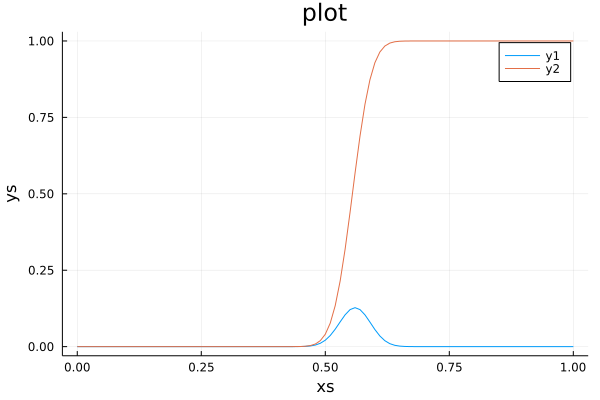

In [4]:
plot(pmf)
plot!(cum.Index, cum.cmf)

In [5]:
loc(cum, 0.61)

,Index,cmf
,Float64,Float64
62,0.61,0.96383


In [6]:
c = make_cdf(pmf);

In [7]:
cdf(c, 0.61)

0.9638303193984253

In [8]:
cdf(c, 0.615)

0.9735854849783132

In [9]:
credible_interval(c, 0.9)

2-element Vector{Float64}:
 0.5025940531880351
 0.6060343347469462

In [10]:
p = make_pdf(c)

101×2 DataFrame
 Row │ Values   Probs        
     │ Float64  Float64      
─────┼───────────────────────
   1 │    0.0   0.0
   2 │    0.01  1.25633e-207
   3 │    0.02  5.73192e-166
   4 │    0.03  8.33871e-142
   5 │    0.04  8.26926e-125
   6 │    0.05  9.65227e-112
   7 │    0.06  3.66836e-101
   8 │    0.07  2.66736e-92
  ⋮  │    ⋮          ⋮
  95 │    0.94  2.22045e-16
  96 │    0.95  2.22045e-16
  97 │    0.96  2.22045e-16
  98 │    0.97  2.22045e-16
  99 │    0.98  2.22045e-16
 100 │    0.99  2.22045e-16
 101 │    1.0   2.22045e-16
              86 rows omitted

In [11]:
make_die(x) = pmf_from_seq(1:x)

make_die (generic function with 1 method)

In [12]:
die=make_die(6)
dice = fill(die, 3);

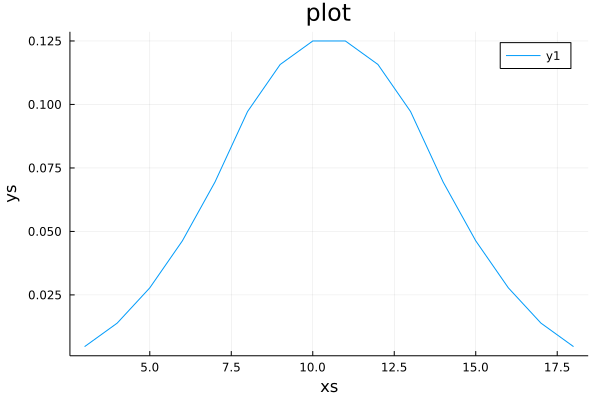

In [13]:
pmf_3d6 = reduce(add_dist, dice)
plot(pmf_3d6)

In [14]:
n = 10000
a = rand(1:6, (n, 4));

In [15]:
sort!(a, dims=2);

In [16]:
a[1:6,:]

6×4 Matrix{Int64}:
 3  3  5  5
 1  3  5  5
 1  2  4  4
 1  2  2  3
 2  2  3  4
 1  6  6  6

In [17]:
t = sum(a[:,2:end], dims=2);

In [18]:
pmf_best3 = pmf_from_seq(t[1:10000]);


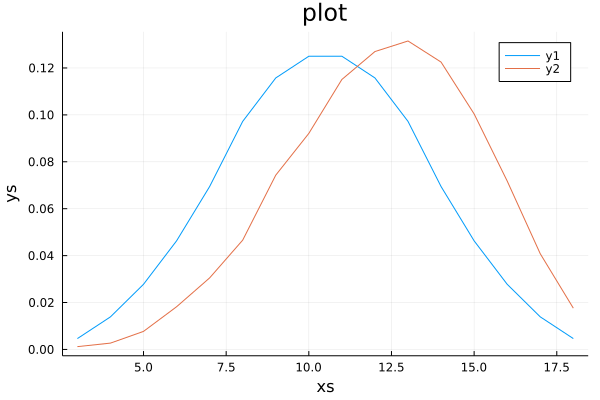

In [19]:
plot!(pmf_best3)

In [20]:
cdf_best3 = make_cdf(pmf_best3);

In [21]:
cdf_max6 = cdf_best3^6;

In [22]:
pmf_max6 = make_pdf(cdf_max6);

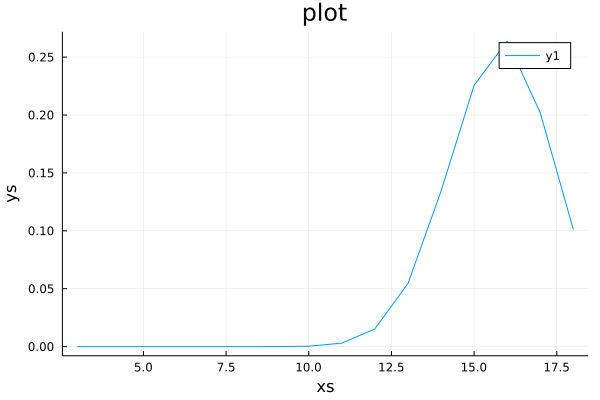

In [23]:
plot(pmf_max6)

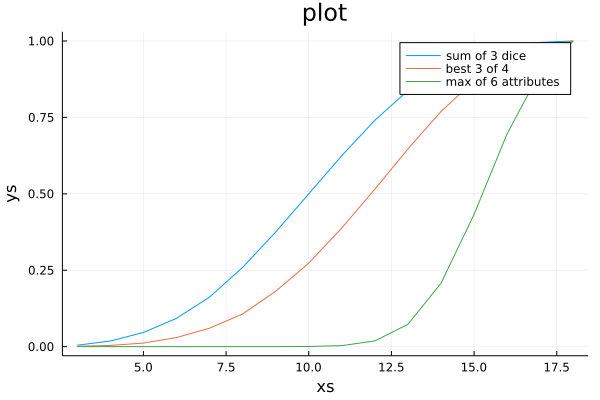

In [24]:
cdf_3d6 = make_cdf(pmf_3d6)
plot(cdf_3d6, label="sum of 3 dice")
plot!(cdf_best3, label="best 3 of 4")
plot!(cdf_max6, label="max of 6 attributes")

_Minimum_

In [25]:
prob_gt = make_ccdf(cdf_best3);

In [26]:
prob_gt6 = prob_gt^6;

In [27]:
cdf_min6 = make_cdf(prob_gt6);

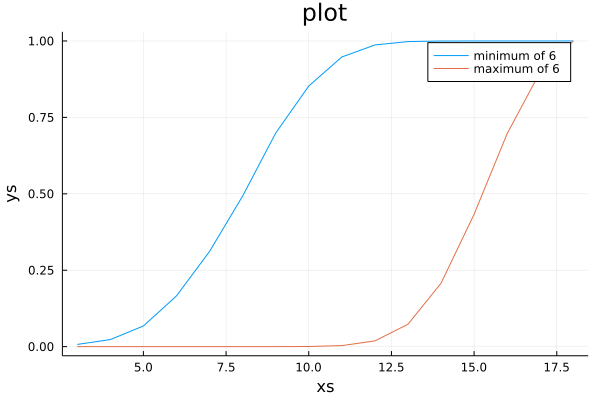

In [28]:
plot(cdf_min6, label="minimum of 6")
plot!(cdf_max6, label="maximum of 6")

In [29]:
cdf_min_dist = min_dist(cdf_best3, 6)
cdf_min_dist ≈ cdf_min6

true

_Mixture_

In [30]:
d4 = make_die(4)
d6 = make_die(6);

In [31]:
(pdf(d4, 1) + pdf(d6, 1)) / 2

0.20833333333333331

In [32]:
(pdf(d4, 6) + pdf(d6, 6)) / 2


0.08333333333333333

In [33]:
mix1 = (d4 + d6) / 2 |> make_pmf

6×2 DataFrame
 Row │ Values  Probs     
     │ Int64   Float64   
─────┼───────────────────
   1 │      1  0.208333
   2 │      2  0.208333
   3 │      3  0.208333
   4 │      4  0.208333
   5 │      5  0.0833333
   6 │      6  0.0833333

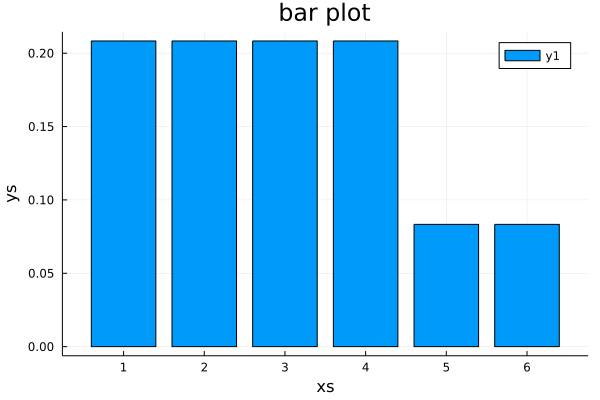

In [34]:
bar(mix1)

In [35]:
mix2 = (d4 + d6 * 2) / 3 |> make_pmf

6×2 DataFrame
 Row │ Values  Probs    
     │ Int64   Float64  
─────┼──────────────────
   1 │      1  0.194444
   2 │      2  0.194444
   3 │      3  0.194444
   4 │      4  0.194444
   5 │      5  0.111111
   6 │      6  0.111111

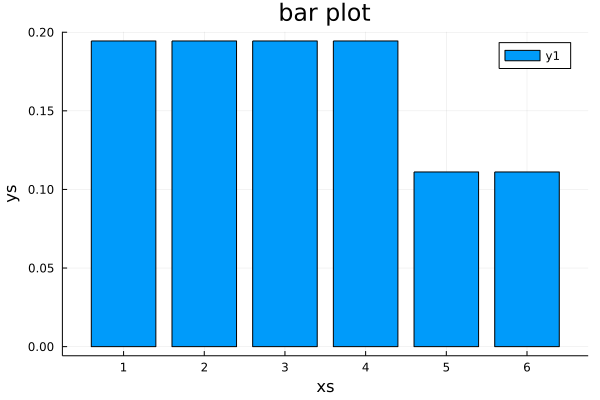

In [36]:
bar(mix2)

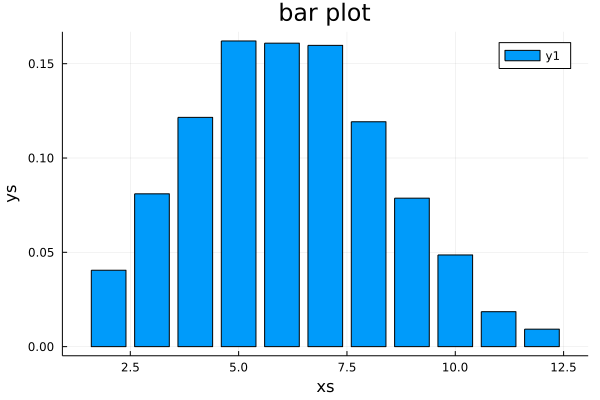

In [37]:
total_damage = add_dist(mix1, mix2)
bar(total_damage)

_General Mixtures_

In [38]:
hypos = [4, 6, 8]
counts = [1, 2, 3]
pmf_dice = pmf_from_seq(hypos, counts=counts)

3×2 DataFrame
 Row │ Values  Probs    
     │ Int64   Float64  
─────┼──────────────────
   1 │      4  0.166667
   2 │      6  0.333333
   3 │      8  0.5

In [39]:
dice = [make_die(sides) for sides in hypos];

In [40]:
dice[1]
length(dice)

3

In [41]:
df = make_df_from_seq_pmf(dice)

,x1,x2,x3
,Float64,Float64,Float64
1,0.25,0.166667,0.125
2,0.25,0.166667,0.125
3,0.25,0.166667,0.125
4,0.25,0.166667,0.125
5,0.0,0.166667,0.125
6,0.0,0.166667,0.125
7,0.0,0.0,0.125
8,0.0,0.0,0.125


In [42]:
sum(reshape(reduce(vcat, values(eachcol(df)) .* probs(pmf_dice)), 8, 3), dims=2)

8×1 Matrix{Float64}:
 0.1597222222222222
 0.1597222222222222
 0.1597222222222222
 0.1597222222222222
 0.11805555555555555
 0.11805555555555555
 0.0625
 0.0625

In [43]:
a = [[pdf(x, i) for i in values(x)] for x in dice]
max_len = length.(a) |> maximum
a1 = [vcat(x, fill(0, max_len - length(x))) for x in a]
a1 = reshape(reduce(vcat, a1), 8, 3)
a1 * probs(pmf_dice)

8-element Vector{Float64}:
 0.1597222222222222
 0.1597222222222222
 0.1597222222222222
 0.1597222222222222
 0.11805555555555555
 0.11805555555555555
 0.0625
 0.0625

In [44]:
mix = make_mixture(pmf_dice, dice)

8-element Vector{Float64}:
 0.1597222222222222
 0.1597222222222222
 0.1597222222222222
 0.1597222222222222
 0.11805555555555555
 0.11805555555555555
 0.0625
 0.0625

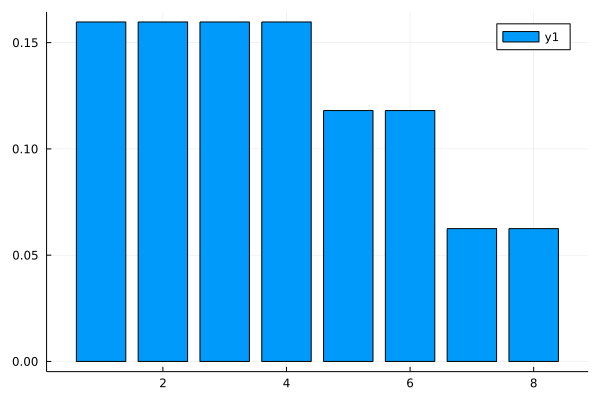

In [45]:
bar(mix)